## @(내적) 연산자 이해

In [1]:
import numpy as np
a = np.array([[1,2,0],[1,0,1],[2,1,1]])
b = np.array([[1,2,1],[1,1,0],[1,2,1]])
# 1 2 0 / 2 2 0 / 1 0 0 => 3 4 1
# 1 0 1 / 2 0 2 / 1 0 1 => 2 4 2
# 2 1 1 / 4 1 2 / 2 0 1 => 4 7 3
print(a@b)
print(np.sum(a@b))

[[3 4 1]
 [2 4 2]
 [4 7 3]]
30


In [2]:
print(np.dot(a,b)) # dot은 내적연산자랑 같다

[[3 4 1]
 [2 4 2]
 [4 7 3]]


In [3]:
print(a.dot(b))

[[3 4 1]
 [2 4 2]
 [4 7 3]]


In [4]:
print(a.shape)
A = a.reshape(1,9) # 행 1개가 있기 때문에 대괄호 2개로 감싼다
print(A)

(3, 3)
[[1 2 0 1 0 1 2 1 1]]


**P. 54 [예제]**

In [5]:
import numpy as np

seven = np.array([[0,1,1,1,0],
                   [0,1,0,1,0],
                   [0,0,0,1,0],
                   [0,0,0,1,0],
                   [0,0,0,1,0]])
A = np.array([[0,0,0],[1,1,1],[0,0,0]]) #3×3 행렬

S = []
for i in range( 3 ) :
    for j in range( 3 ) :
        M = seven[i : i+3, j : j+3]
        S.append((M@A).sum())
S = np.array(S).reshape(3,3)
print( S )


[[6 3 9]
 [3 0 9]
 [0 0 9]]


**P. 56 [프로젝트] 숫자 이미지 차원 줄여 표현해보기**

In [8]:
#단계1: 숫자 행렬 차원 줄이기
import numpy as np
import matplotlib.pyplot as plt

seven = np.array([[0,1,1,1,0],
                  [0,1,0,1,0],
                  [0,0,0,1,0],
                  [0,0,0,1,0],
                  [0,0,0,1,0]])
A = np.array([[0,0,0],[1,1,1],[0,0,0]])  #3×3 행렬
S = []
for i in range( 3 ) :
    for j in range( 3 ) :
        M = seven[ i : i+3, j : j+3 ]
        S.append( (M@A).sum() )
S = np.array(S).reshape(3,3)


In [7]:
#단계2: 픽셀당 RGB 값 부여하여 이미지 데이터 만들기

imgData1 = np.zeros((5, 5, 3))
for i in range(len(seven)) :
    for j in range(len(seven[i]) ) :
        if not seven[i][j] :
            imgData1[i][j] = [1, 1, 1]    # 흰색

imgData2 = np.zeros((3, 3, 3))
for i in range(len(S)) :
    for j in range(len(S[i]) ) :
        if S[i][j] :
            imgData2[i][j] = [S[i][j]*0.1, 0, 0]   # 빨간색
        else :
            imgData2[i][j] = [1, 1, 1]

print(imgData2)

[[[0.6 0.  0. ]
  [0.3 0.  0. ]
  [0.9 0.  0. ]]

 [[0.3 0.  0. ]
  [1.  1.  1. ]
  [0.9 0.  0. ]]

 [[1.  1.  1. ]
  [1.  1.  1. ]
  [0.9 0.  0. ]]]


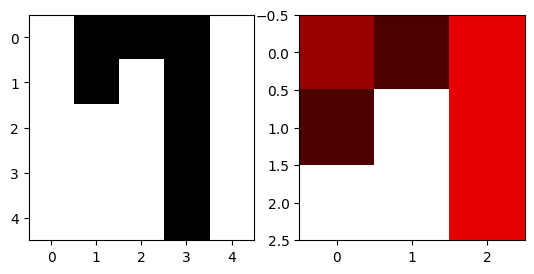

In [8]:
# 단계3: 만들어 놓은 이미지 데이터로 색을 표현하기
fig = plt.figure()
rows=1
cols=2
ax1 = fig.add_subplot(rows, cols, 1)
ax1.imshow(imgData1)
ax2 = fig.add_subplot(rows, cols, 2)
ax2.imshow(imgData2)
plt.show()

# Ⅱ 학습 및 최적화

**P. 94 [코딩으로 해결하기]**

In [9]:
import numpy as np
X = np.array([1, 3, 5, 7])
Y = np.array([4, 2, 3, 1])
y1 = -X + 5
y2 = -1/2*X + 9/2
print('정국 : %.2f' %(np.sum((Y-y1)**2)))
print('예린 : %.2f' %(np.sum((Y-y2)**2)))

정국 : 18.00
예린 : 2.00


**p.101 [프로젝트] 파이선으로 경사하강법 구현해보기**

iter = 0, loss = 0.50, w = (7.00, -0.98)
iter = 1000, loss = 0.23, w = (6.00, -0.73)
iter = 2000, loss = 0.23, w = (5.98, -0.73)
iter = 3000, loss = 0.23, w = (5.98, -0.73)
iter = 4000, loss = 0.23, w = (5.98, -0.73)
손실함수 초깃값: 0.50
손실함수 최종값: 0.23


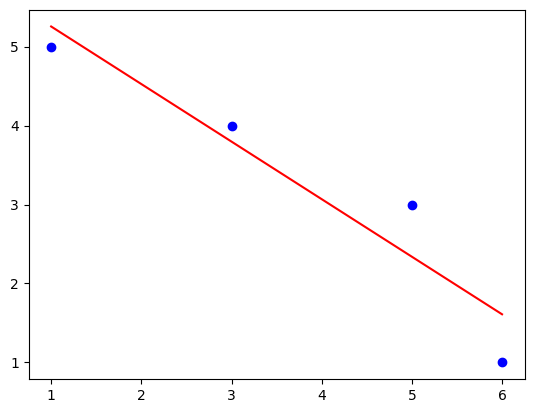

In [4]:
import numpy as np

# 선형 회귀 모델 예측 함수
def pred(x, w):
    # x는 입력 데이터, w는 가중치이며, 두 행렬의 내적을 반환
    return x @ w

# 입력 데이터 (x1 = 1은 절편을 위한 상수항)
x = np.array([[1, 1], [1, 3], [1, 5], [1, 6]])  # (4,2) 크기
yt = np.array([5, 4, 3, 1])  # 실제값 (목표값)

# 초기 가중치 설정
w = np.array([7, -1])  # (2,) 크기, 초기 가중치

# 학습 반복 횟수
iters = 5000
# 학습률 설정
alpha = 0.01

# 손실 함수 값을 저장할 리스트
history = [[0, 0]]

# 경사 하강법 구현
for i in range(iters):
    yp = pred(x, w)  # 예측값 계산
    yd = yp - yt     # 예측값과 실제값의 차이 계산 (오차)

    # 가중치 업데이트: 오차의 그래디언트를 사용하여 가중치 조정
    w = w - alpha * (x.T @ yd) / 2

    # 특정 간격으로 학습 상황 출력
    if i % 1000 == 0:
        loss = np.mean(yd ** 2)  # 평균 제곱 오차 계산
        history.append([i, loss])
        print(f'iter = {i}, loss = {loss:.2f}, w = ({w[0]:.2f}, {w[1]:.2f})')

# 최종 결과 출력
print(f'손실함수 초깃값: {history[1][1]:.2f}')
print(f'손실함수 최종값: {history[-1][1]:.2f}')

# 데이터와 모델의 예측 결과를 시각화
import matplotlib.pyplot as plt
plt.plot(x[:, 1], yt, 'bo')  # 실제값을 파란색 점으로 표시
plt.plot(x[:, 1], yp, 'r')  # 모델의 예측값을 빨간색 선으로 표시
plt.show()  # 그래프 보여주기


**P. 104 [코딩으로 해결하기]**

시그모이드 함수 그래프 



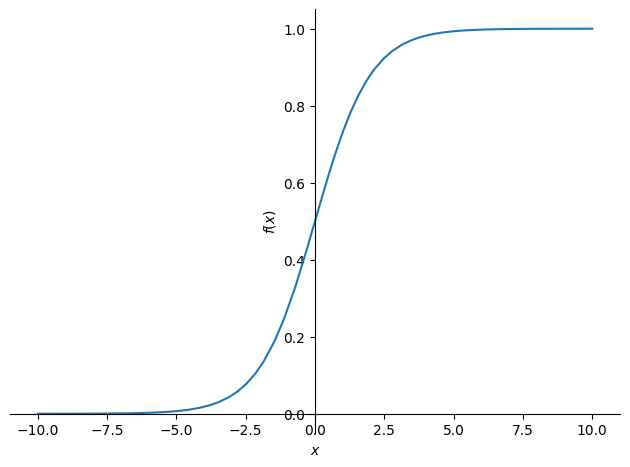

미분 결과:  exp(-x)/(1 + exp(-x))**2


In [1]:
# 시그모이드 함수(입력값의 범위를 0과 1 사이로 압축)

import sympy as sym
import numpy as np
from sympy.plotting import plot

# 시그모이드 함수를 정의하기 위한 기호 변수 x, y를 생성합니다.
x = sym.symbols('x')
y = sym.symbols('y')

# y에 시그모이드 함수의 분모 부분을 정의합니다.
y = 1 + sym.exp(-x)  # exp는 자연로그의 밑 e의 지수 함수를 나타냅니다.

# 시그모이드 함수 gx를 정의합니다.
gx = 1 / y  # 이는 로지스틱 함수의 일반적인 형태입니다.

# 시그모이드 함수의 그래프를 출력합니다.
print('시그모이드 함수 그래프 \n')
plot(gx)

# gx를 x에 대해 미분합니다.
g_x = sym.diff(gx, x)  # diff 함수는 주어진 표현식을 변수 x에 대해 미분합니다.

# 미분 결과를 출력합니다.
print('미분 결과: ', g_x)


**P. 107 [코딩으로 해결하기]**

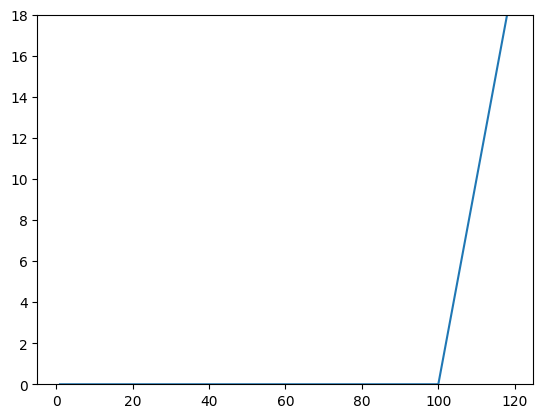

In [2]:
# 렐루 함수(입력이 0을 넘으면 그 입력을 그대로 출력하고, 0 이하이면 0을 출력하는 함수)

import numpy as np
import matplotlib.pylab as plt

# 입력값이 100을 넘으면 입력값에서 100을 빼서 반환하고, 그렇지 않으면 0을 반환하는 함수입니다.
def func(x):
    if x <= 100:
        return 0
    else:
        return x - 100

# 1.0에서 119까지 정수 간격으로 배열 x를 생성합니다.
x = np.arange(1.0, 120, 1)

# y 값을 저장할 빈 리스트를 초기화합니다.
y = []

# x 배열의 각 값에 대해 func 함수를 적용하고 결과를 y 리스트에 추가합니다.
for data in x:
    y.append(func(data))

# x와 y 데이터를 이용해 그래프를 그립니다.
plt.plot(x, y)

# y축의 범위를 0에서 18까지 제한합니다.
plt.ylim(0, 18)

# 그래프를 화면에 표시합니다.
plt.show()


**P. 109 [코딩으로 해결하기]**

In [3]:
# 소프트맥스 함수 : 입력받은 값을 0과 1 사이의 값으로 정규화하여 출력하고, 출력값들의 합이 1이 되도록 한다.

import numpy as np

def softMax( x ) :
    return x / ( 1 + np.exp(1) + np.exp(2))

X = np.exp(np.array( [0, 1, 2] ))
Y = softMax( X )
print( Y )

[0.09003057 0.24472847 0.66524096]


**p.111 [프로젝트] 인공 신경망을 이용한 AND 게이트 구현해 보기**

다음 문제의 참고 사이트
[퍼셉트론 and 게이트](https://davinci-ai.tistory.com/24)

In [5]:
#tensorflow 사용하지 않는 np코드(이것으로 수업함)
# 단계1: 데이터 설정하기
import numpy as np
X = np.array( [ [0,0], [0,1], [1,0], [1,1] ] )  #입력
Y = np.array( [[0], [0], [0], [1]])            #출력

#import tensorflow as tf
w = np.random.normal( size = 2 )          #가중치
b = np.random.normal( size = 1 )          #편향
a = 0.1                                    #학습률
print(w,b)

[-1.25260715  0.68722648] [-0.19565592]


In [6]:
#단계2: sigmoid함수 정의하고 학습시키기
def sigmoid( x ) :
    return 1/(1+np.exp(-x))

for i in range( 10000 ) :
    error_sum = 0
    for j in range( 4 ) :
        output = sigmoid( np.sum( X[j]*w ) + b)
        error = Y[j][0] - output
        w = w + X[j] * a * error
        b = b + a * error
        error_sum += error
    if i % 1000 == 0 :
        print( i, error_sum )


0 [-0.51176774]
1000 [-0.02944119]
2000 [-0.01510075]
3000 [-0.01011219]
4000 [-0.00759046]
5000 [-0.00607154]
6000 [-0.00505744]
7000 [-0.00433273]
8000 [-0.00378919]
9000 [-0.00336653]


In [7]:
#단계3: 각각의 입력 값에 따른 출력값 예측하기
for i in range(4) :
    print('X :', X[i], '==> 예측 Y :', sigmoid(np.sum(X[i]*w)+b))

X : [0 0] ==> 예측 Y : [1.82856638e-07]
X : [0 1] ==> 예측 Y : [0.00504693]
X : [1 0] ==> 예측 Y : [0.0050501]
X : [1 1] ==> 예측 Y : [0.99294797]
